# Trabajo práctico Aprendizaje Automático 1

In [1]:
#Importamos las librerias

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sys.path.append("code")
current_dir = os.path.dirname(os.path.realpath('__file__'))
data_source = os.path.join(current_dir, 'data', 'weatherAUS.csv')

from cleaning.clean import Clean
from regresion_lineal.regresion import RegressionLineal
from shap_analyzer.shap_analyzer import SHAPAnalyzer
from modelo_base.regression import RegresionModelBase
from modelo_base.clasification import ClasificationModelBase
from neural_network.classification_neural import ClassificationNeuralNetwork
from neural_network.regression_neural import RegressionNeuralNetwork



IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [2]:
### Carga datos de dataset
### Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
### tras observar los datos del día de hoy, el objetivo es predecir las variables target:
###                                                                                     -RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.
###                                                                                     -RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.

df = pd.read_csv(data_source)

# Análisis descriptivo

In [3]:
df.info()

# el dataset cuenta con un total de 145412 datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

In [4]:
# Filtramos por las ciudades de interés
ciudades = ['Sydney', 'SydneyAirport', 'Canberra', 'Melbourne', 'MelbourneAirport']

df = df[df['Location'].isin(ciudades)]

In [5]:
# visualizamos los datos
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
30167,30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,6.0
30168,30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,6.6
30169,30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,18.8
30170,30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,77.4
30171,30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,1.6


In [6]:
# vemos los nombres de las columnas
df.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [7]:
# observamos la información de cada variable y si hay nulos
df.info()
"""
Contamos con un total de 15986 datos.
Tenemos 25 columnas, de las cuales 18 son variables numéricas, 1 es tipo int64 y 17 son tipo loat64. Las otras 7 son variables categóricas, tipo object.
"""

<class 'pandas.core.frame.DataFrame'>
Index: 15986 entries, 30167 to 70370
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15986 non-null  int64  
 1   Date              15986 non-null  object 
 2   Location          15986 non-null  object 
 3   MinTemp           15495 non-null  float64
 4   MaxTemp           15500 non-null  float64
 5   Rainfall          15199 non-null  float64
 6   Evaporation       14280 non-null  float64
 7   Sunshine          14038 non-null  float64
 8   WindGustDir       14529 non-null  object 
 9   WindGustSpeed     14531 non-null  float64
 10  WindDir9am        15291 non-null  object 
 11  WindDir3pm        15696 non-null  object 
 12  WindSpeed9am      15725 non-null  float64
 13  WindSpeed3pm      15737 non-null  float64
 14  Humidity9am       15416 non-null  float64
 15  Humidity3pm       15461 non-null  float64
 16  Pressure9am       15251 non-null  float64

'\nContamos con un total de 15986 datos.\nTenemos 25 columnas, de las cuales 18 son variables numéricas, 1 es tipo int64 y 17 son tipo loat64. Las otras 7 son variables categóricas, tipo object.\n'

In [8]:
# Cantidad de valores faltantes.
df.isna().sum()

Unnamed: 0             0
Date                   0
Location               0
MinTemp              491
MaxTemp              486
Rainfall             787
Evaporation         1706
Sunshine            1948
WindGustDir         1457
WindGustSpeed       1455
WindDir9am           695
WindDir3pm           290
WindSpeed9am         261
WindSpeed3pm         249
Humidity9am          570
Humidity3pm          525
Pressure9am          735
Pressure3pm          726
Cloud9am            2677
Cloud3pm            2932
Temp9am              505
Temp3pm              496
RainToday            787
RainTomorrow         787
RainfallTomorrow     787
dtype: int64

In [9]:
# Estadística descriptiva de las variables numéricas
df.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,15986.000000,15495.000000,15500.000000,15199.000000,14280.000000,14038.000000,14531.000000,15725.000000,15737.000000,15416.000000,15461.000000,15251.000000,15260.000000,13309.000000,13054.000000,15481.000000,15490.000000,15199.000000
mean,49512.619855,11.605221,21.751781,2.303744,4.866828,6.854694,44.417315,16.613672,21.797166,68.903023,51.280577,1018.305836,1016.064239,4.750545,4.746131,15.545953,20.229154,2.302586
std,15172.399796,5.851347,6.053679,7.385992,3.069869,3.842419,14.958027,10.336386,9.518033,15.614788,17.721335,7.400730,7.265386,2.728329,2.589879,5.559295,5.857956,7.385251
min,30176.000000,-8.000000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,3.000000,986.700000,985.500000,0.000000,0.000000,-1.300000,3.700000,0.000000
25%,34173.250000,7.900000,17.100000,0.000000,2.600000,3.700000,33.000000,9.000000,15.000000,59.000000,39.000000,1013.400000,1011.200000,2.000000,2.000000,11.600000,15.900000,0.000000
50%,47228.500000,11.600000,21.300000,0.000000,4.200000,7.500000,43.000000,15.000000,20.000000,70.000000,51.000000,1018.500000,1016.300000,6.000000,6.000000,15.400000,19.800000,0.000000
75%,66393.750000,15.800000,25.800000,0.800000,6.600000,10.000000,54.000000,22.000000,28.000000,80.000000,62.000000,1023.300000,1021.000000,7.000000,7.000000,19.500000,24.100000,0.800000
max,70391.000000,30.500000,46.800000,119.400000,23.800000,13.900000,122.000000,69.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.200000,46.100000,119.400000


### Analizamos nuestra variable objetivo, la que queremos predecir para saber si el df esta balanceado o no.

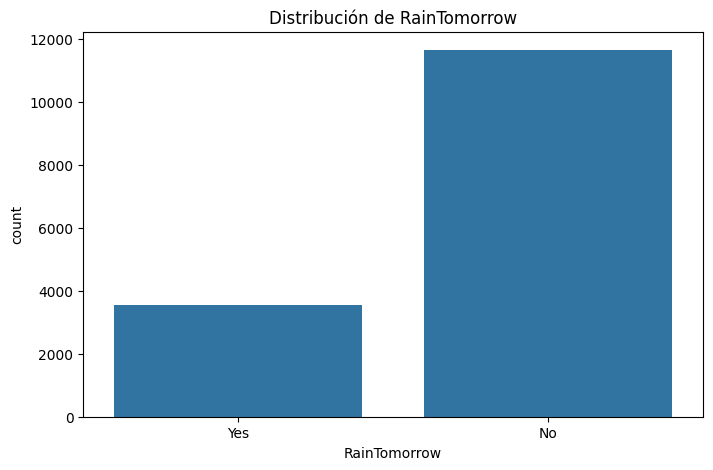

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribución de RainTomorrow')
plt.show()

### Se puede observar que el dataset no esta balanceado, con esto podemos decir que nos va a predecir mejor cuando no llueve que cuando llueve

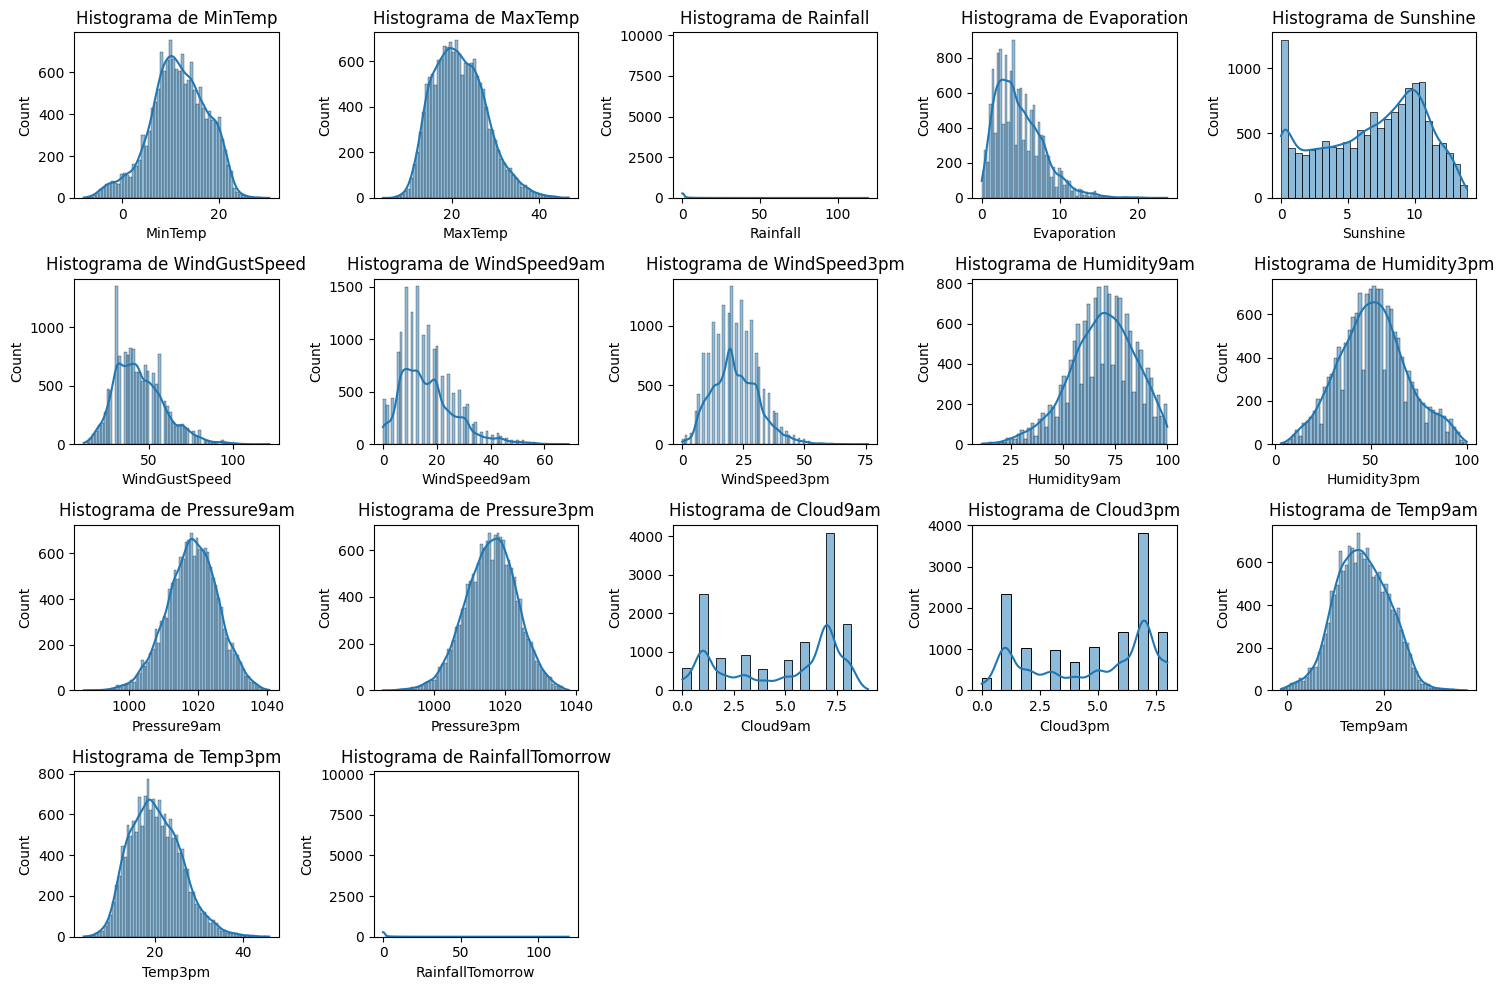

In [11]:
# Seleccionar columnas numéricas
numeric_columns = df.select_dtypes(include=[np.float64]).columns

# Realizamos histogramas de las columnas numéricas para observar su dispersión
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Histograma de {column}')

plt.tight_layout()
plt.show()


Podemos observar los distintos tipos de distribución, entre ellas hay varias columnas que presentan una distribución normal

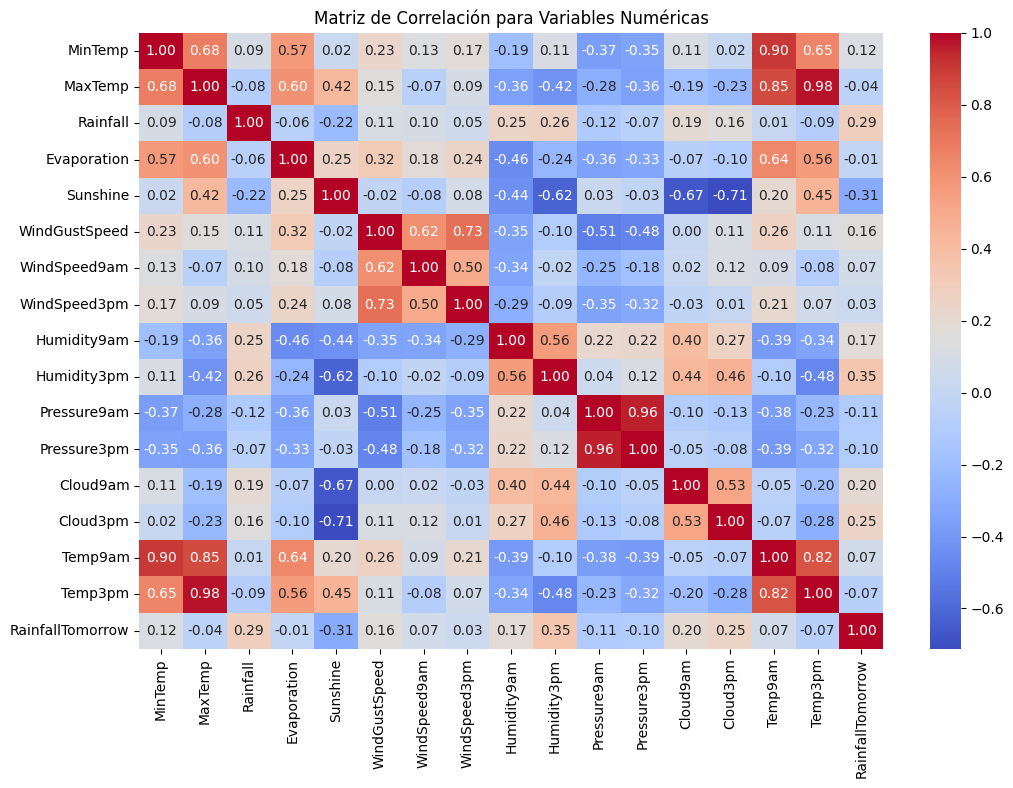

In [12]:
# Matriz de correlación para variables numéricas
correlation_matrix_numeric = df[numeric_columns].corr()

# Plotear la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para Variables Numéricas')
plt.show()


Podemos observar que las variables con mayor correlación con RainfallTomorrow son:

*   Humidity3pm 0.35
*   Sunshine -0.31
*   Rainfall 0.29
*   Cloud3pm 0.25

### Realizamos la limpieza en la clase clean y volvemos a visualizar los datos

In [13]:
data = Clean(data_source)
#nos devuelve el dataset limpio
data_clean = data.process()
# data_clean.save_clean_data('data/weatherAUS_clean.csv')
data_clean.head()

Archivo guardado exitosamente en 'data/weatherAUS_clean.csv'
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
30167,19.5,22.4,15.6,6.2,0.0,3.0,17.0,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1,6.0
30168,19.5,25.6,6.0,3.4,2.7,4.0,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1,6.6
30169,21.6,24.5,6.6,2.4,0.1,2.0,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1,18.8
30170,20.2,22.8,18.8,2.2,0.0,1.0,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1,77.4
30171,19.7,25.7,77.4,2.2,0.0,1.0,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1,1.6


In [14]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15751 entries, 30167 to 70370
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           15751 non-null  float64
 1   MaxTemp           15751 non-null  float64
 2   Rainfall          15751 non-null  float64
 3   Evaporation       15751 non-null  float64
 4   Sunshine          15751 non-null  float64
 5   WindGustDir       15751 non-null  float64
 6   WindSpeed9am      15751 non-null  float64
 7   WindSpeed3pm      15751 non-null  float64
 8   Humidity9am       15751 non-null  float64
 9   Humidity3pm       15751 non-null  float64
 10  Pressure9am       15751 non-null  float64
 11  Pressure3pm       15751 non-null  float64
 12  Cloud9am          15751 non-null  float64
 13  Cloud3pm          15751 non-null  float64
 14  Temp9am           15751 non-null  float64
 15  Temp3pm           15751 non-null  float64
 16  RainToday         15751 non-null  int32  

In [15]:
data_clean.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
count,15751.000000,15751.000000,15751.000000,15751.000000,15751.000000,15751.000000,15751.000000,15751.000000,15751.000000,15751.000000,15751.000000,15751.000000,15751.000000,15751.000000,15751.000000,15751.000000,15751.000000,15751.000000,15751.000000
mean,11.815053,21.787620,2.192051,4.541623,6.443096,2.546251,16.606184,21.801790,68.829789,51.649165,1018.368719,1016.171081,4.822107,4.845851,15.703638,20.267151,0.222526,0.230017,2.194019
std,5.841823,5.943541,7.233547,3.058798,3.841166,1.159804,10.333745,9.507708,15.379249,17.381397,7.295996,7.177390,2.670397,2.551436,5.539552,5.748409,0.415955,0.420857,7.238178
min,-8.000000,4.100000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.000000,3.000000,986.700000,985.500000,0.000000,0.000000,-1.300000,3.700000,0.000000,0.000000,0.000000
25%,8.100000,17.300000,0.000000,2.000000,2.800000,1.000000,9.000000,15.000000,59.000000,40.000000,1013.600000,1011.400000,2.000000,2.000000,11.700000,16.000000,0.000000,0.000000,0.000000
50%,11.800000,21.500000,0.000000,4.000000,6.800000,3.000000,15.000000,20.000000,69.000000,52.000000,1018.700000,1016.600000,6.000000,6.000000,15.600000,20.000000,0.000000,0.000000,0.000000
75%,16.400000,25.500000,0.600000,6.400000,9.800000,4.000000,22.000000,28.000000,80.000000,62.000000,1023.200000,1020.900000,7.000000,7.000000,20.000000,23.900000,0.000000,0.000000,0.600000
max,30.500000,46.800000,119.400000,23.800000,13.900000,4.000000,69.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.200000,46.100000,1.000000,1.000000,119.400000


In [16]:
print(data_clean.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')


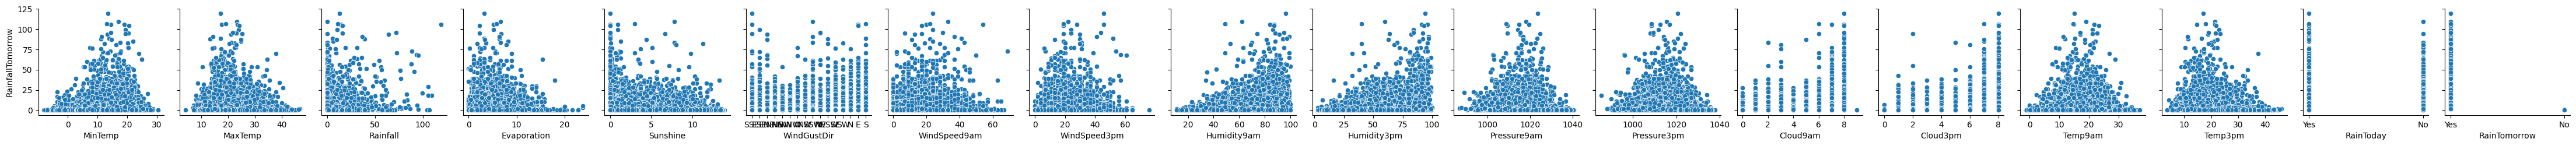

In [17]:
#Observamos la distribución para ver si hay linealidad
columnas = [col for col in data_clean.columns if ((col != 'RainfallTomorrow') & (col != 'Location') & (col != 'Date'))]

sns.pairplot(df, x_vars=columnas, y_vars='RainfallTomorrow')
plt.show()

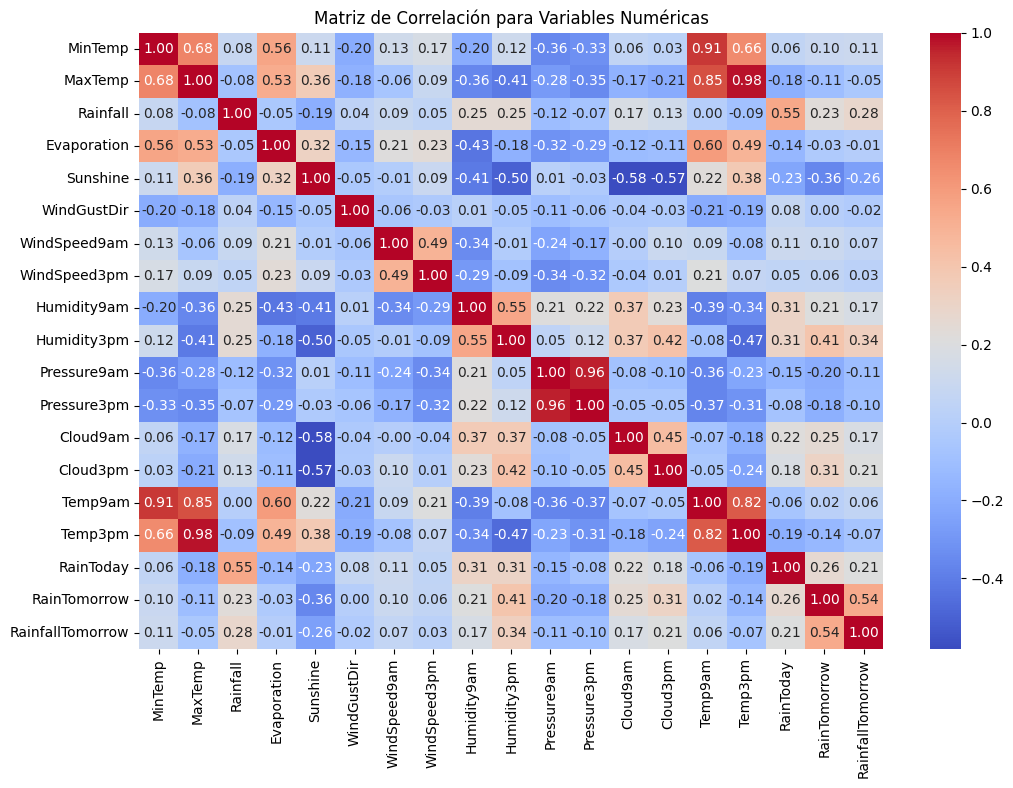

In [18]:
# Seleccionar columnas numéricas
numeric_columns = data_clean.select_dtypes(include=[np.float64, np.int32]).columns

# Matriz de correlación para variables numéricas
correlation_matrix_numeric = data_clean[numeric_columns].corr()

# Plotear la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para Variables Numéricas')
plt.show()

### En esta parte implementamos en simultaneo las siguientes consignas:

* Implementar la solución del problema de regresión con regresión lineal múltiple.

* Optimizar la selección de hiperparámetros.

* Implementar explicabilidad del modelo. SHAP


In [19]:
regresion_clasic = RegressionLineal(data_clean)
x_test, y_test, y_pred, modelo = regresion_clasic.classic()
metricas = regresion_clasic.metrics(y_test, y_pred)
print(f"Métricas del modelo Regresion lineal clasic:")
print(metricas)

Métricas del modelo Regresion lineal clasic:
{'MSE': 50.815763295397815, 'R2': 0.16410488004986967, 'RMSE': 7.128517608549327, 'MAE': 3.1518882650809816, 'MAPE': inf}


In [20]:
#aplicamos validación cruzada
regresion_clasic.cross_validate(x_test, y_test, modelo, cv=5)

Mean Squared Error (CV): 51.08002087760664
R^2 Score (CV): 0.1597579685985132
Mean Absolute Error (CV): 3.298755299244167


(51.08002087760664, 0.1597579685985132, 3.298755299244167)

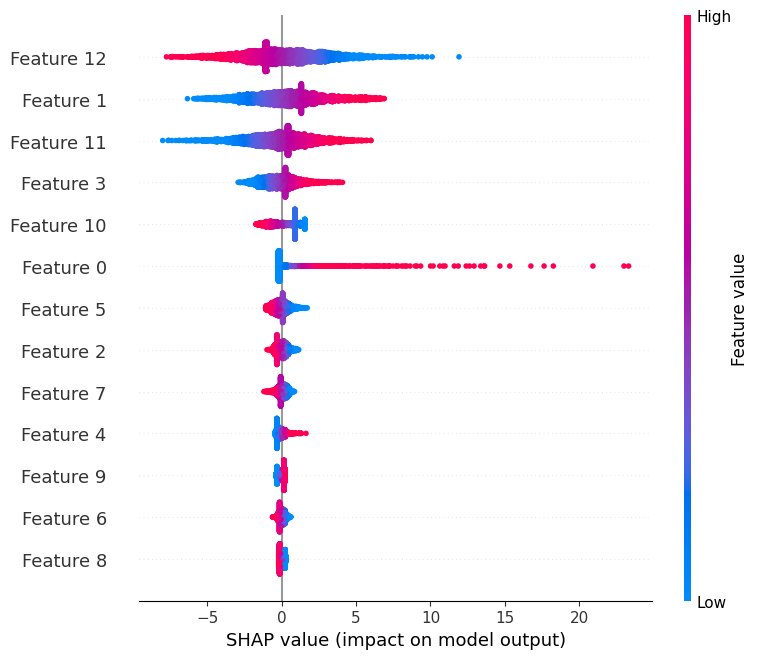

In [21]:
try:
    shap_analyzer = SHAPAnalyzer(modelo, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [22]:
print('métodos de gradiente descendiente')
regresion_gradient_desecent = RegressionLineal(data_clean)
x_test, y_test, y_pred, modelo = regresion_gradient_desecent.gradient_descent()
metricas = regresion_gradient_desecent.metrics(y_test, y_pred)
print(f"Métricas del Modelo:")
print(metricas)

métodos de gradiente descendiente
Métricas del Modelo:
{'MSE': 59.0002584851556, 'R2': 0.029473829668826834, 'RMSE': 7.681162573800635, 'MAE': 2.900145957483869, 'MAPE': inf}


In [23]:
#aplicamos validación cruzada
regresion_gradient_desecent.cross_validate(x_test, y_test, modelo, cv=5)

Mean Squared Error (CV): 55.62534885377689
R^2 Score (CV): 0.08498948678378437
Mean Absolute Error (CV): 3.788407692879349


(55.62534885377689, 0.08498948678378437, 3.788407692879349)

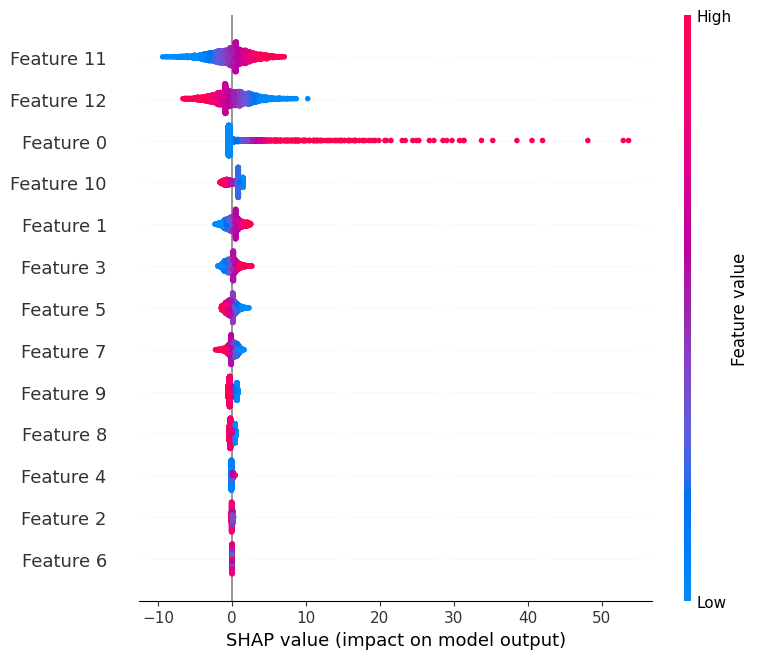

In [24]:
try:
    shap_analyzer = SHAPAnalyzer(modelo, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [25]:
param_grid = {
    'fit_intercept': [True, False],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'max_iter': [100, 200, 500, 1000]  
}

regresion_gradient_descent = RegressionLineal(data_clean)
x_test, y_test, y_pred, best_model = regresion_gradient_descent.gradient_descent_optimize_hyperparameters(param_grid)
metricas = regresion_gradient_descent.metrics(y_test, y_pred)
print(f"Métricas del mejor modelo:")
print(metricas)
print("Mejores hiperparámetros:", best_model.get_params())

Métricas del mejor modelo:
{'MSE': 50.82306101518021, 'R2': 0.16398483603287017, 'RMSE': 7.129029458150682, 'MAE': 3.1519868403287012, 'MAPE': inf}
Mejores hiperparámetros: {'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'adaptive', 'loss': 'squared_error', 'max_iter': 100, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


## Regresión linean de Lasso

In [26]:
# regresion de Lasso
regresion_lasso = RegressionLineal(data_clean)
x_test, y_test, y_pred, lasso_model = regresion_lasso.lasso_regression()
metricas = regresion_lasso.metrics(y_test, y_pred)
print(f"Métricas del modelo Regresion lineal Lasso:")
print(metricas)

Métricas del modelo Regresion lineal Lasso:
{'MSE': 54.01329654171254, 'R2': 0.11150698004519044, 'RMSE': 7.34937388773442, 'MAE': 3.063528857674949, 'MAPE': inf}


In [27]:
#aplicamos validación cruzada
regresion_lasso.cross_validate(x_test, y_test, modelo, cv=5)

Mean Squared Error (CV): 53.51282861839145
R^2 Score (CV): 0.1197394391812232
Mean Absolute Error (CV): 3.391527297223819


(53.51282861839145, 0.1197394391812232, 3.391527297223819)

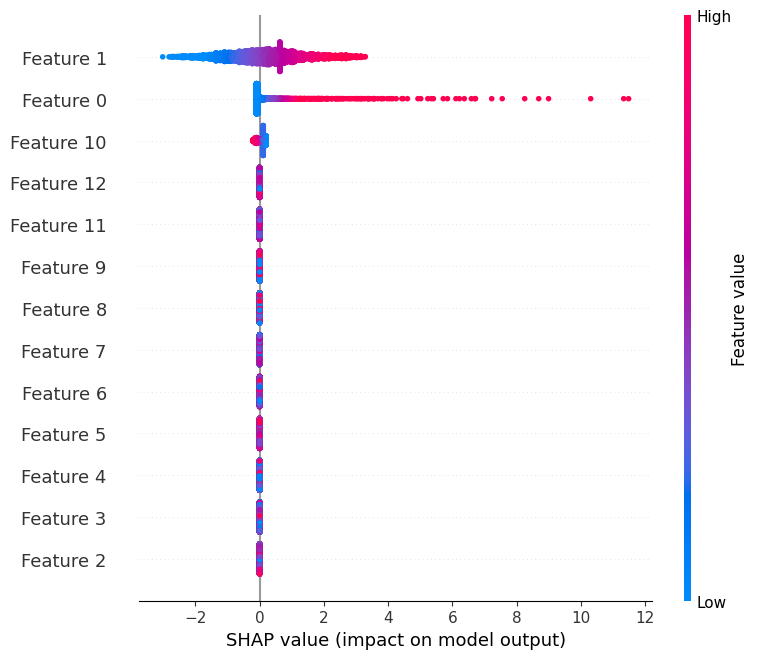

In [28]:
try:
    shap_analyzer = SHAPAnalyzer(lasso_model, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [29]:
# Crear una instancia de la clase RegressionLineal
regresion_lineal = RegressionLineal(data_clean)

# Definir el rango de valores para el hiperparámetro alpha
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

# Llamar al método optimize_hyperparameters para Lasso
x_test, y_test, y_pred_lasso, best_lasso_model = regresion_lineal.optimize_hyperparameters('Lasso', param_grid_lasso)

# Calcular métricas
metricas_lasso = regresion_lineal.metrics(y_test, y_pred_lasso)

# Imprimir métricas y mejores hiperparámetros para Lasso
print(f"Métricas del mejor modelo Lasso:")
print(metricas_lasso)
print("Mejores hiperparámetros para Lasso:", best_lasso_model.get_params())


The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.


Métricas del mejor modelo Lasso:
{'MSE': 50.80861079225175, 'R2': 0.16422253532231856, 'RMSE': 7.128015908529648, 'MAE': 3.1505613480503687, 'MAPE': inf}
Mejores hiperparámetros para Lasso: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


## Regresión lineal de Ridge

In [30]:
# regresion de Ridge

regresion_ridge = RegressionLineal(data_clean)
x_test, y_test, y_pred, ridge_model = regresion_ridge.ridge_regression()
metricas = regresion_lasso.metrics(y_test, y_pred)
print(f"Métricas del modelo Regresion lineal Ridge:")
print(metricas)


Métricas del modelo Regresion lineal Ridge:
{'MSE': 50.81505630884677, 'R2': 0.1641165096421371, 'RMSE': 7.128468019767415, 'MAE': 3.151704500695274, 'MAPE': inf}


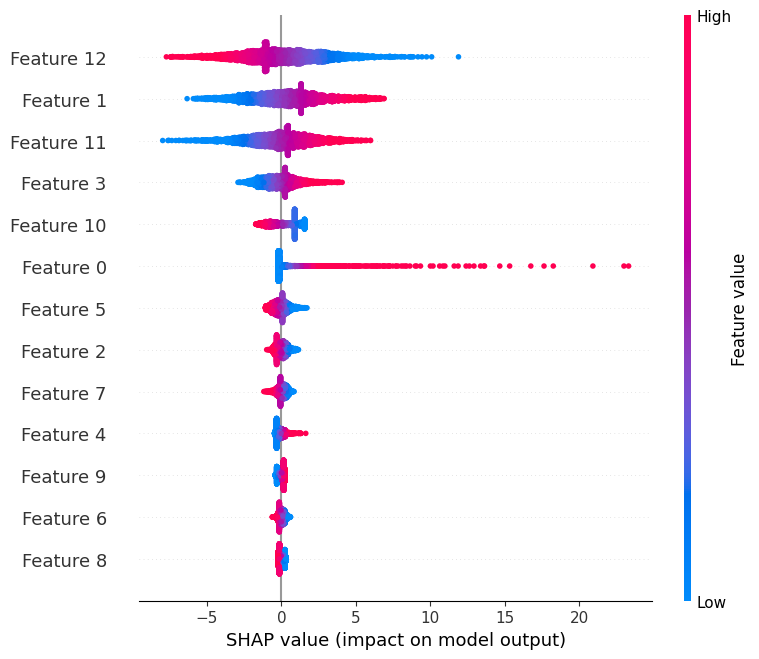

In [31]:
try:
    shap_analyzer = SHAPAnalyzer(ridge_model, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [32]:
# Crear una instancia de la clase RegressionLineal
regresion_lineal = RegressionLineal(data_clean)

# Definir el rango de valores para el hiperparámetro alpha
param_grid_Ridge = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

# Llamar al método optimize_hyperparameters para Lasso
x_test, y_test, y_pred_lasso, best_lasso_model = regresion_lineal.optimize_hyperparameters('Ridge', param_grid_Ridge)

# Calcular métricas
metricas_lasso = regresion_lineal.metrics(y_test, y_pred_lasso)

# Imprimir métricas y mejores hiperparámetros para Lasso
print(f"Métricas del mejor modelo Ridge:")
print(metricas_lasso)
print("Mejores hiperparámetros para Ridge:", best_lasso_model.get_params())

Métricas del mejor modelo Ridge:
{'MSE': 50.81438053216156, 'R2': 0.16412762584696627, 'RMSE': 7.128420619755933, 'MAE': 3.151585842125511, 'MAPE': inf}
Mejores hiperparámetros para Ridge: {'alpha': 100.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}


The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.


## Regresión lineal de Elasticnet

In [33]:
# regresion de Elasticnet

regresion_elasticnet = RegressionLineal(data_clean)
x_test, y_test, y_pred, elasticnet_model = regresion_elasticnet.elasticnet_regression()
metricas = regresion_elasticnet.metrics(y_test, y_pred)
print(f"Métricas del modelo Regresion lineal Elasticnet:")
print(metricas)

Métricas del modelo Regresion lineal Elasticnet:
{'MSE': 53.24993604255302, 'R2': 0.12406389692747477, 'RMSE': 7.297255377369838, 'MAE': 2.9928176755285945, 'MAPE': inf}


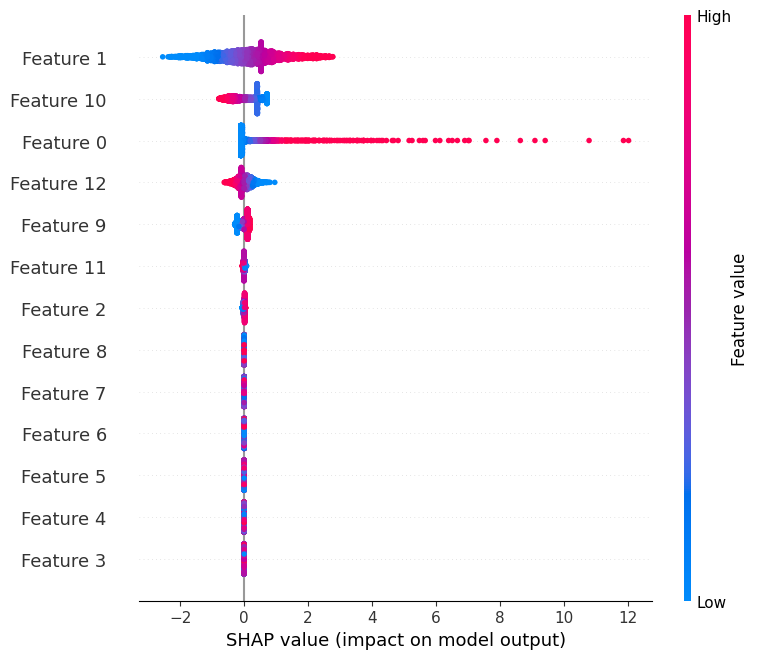

In [34]:
try:
    shap_analyzer = SHAPAnalyzer(elasticnet_model, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [35]:
regresion_lineal = RegressionLineal(data_clean)

# Definir el rango de valores para el hiperparámetro alpha
param_grid_Elasticnet = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Puedes ajustar estos valores según sea necesario
}
# Llamar al método optimize_hyperparameters para Lasso
x_test, y_test, y_pred_elasticnet, best_lasso_model = regresion_lineal.optimize_hyperparameters('ElasticNet', param_grid_Elasticnet)

# Calcular métricas
metricas_elasticnet = regresion_lineal.metrics(y_test, y_pred_elasticnet)

# Imprimir métricas y mejores hiperparámetros para Lasso
print(f"Métricas del mejor modelo Elasticnet:")
print(metricas_elasticnet)
print("Mejores hiperparámetros para Elasticnet:", best_lasso_model.get_params())

Métricas del mejor modelo Elasticnet:
{'MSE': 50.81123710740468, 'R2': 0.16417933368807325, 'RMSE': 7.1282001309871115, 'MAE': 3.151023448078296, 'MAPE': inf}
Mejores hiperparámetros para Elasticnet: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


## Regresión Logística

Accuracy: 0.99
Precision: 0.99
Recall: 0.96
F1 Score: 0.97
ROC-AUC: 0.98
Matiz de confusión:
          pred: No  Pred: Si
Real: No      2485         6
Real: si        27       633


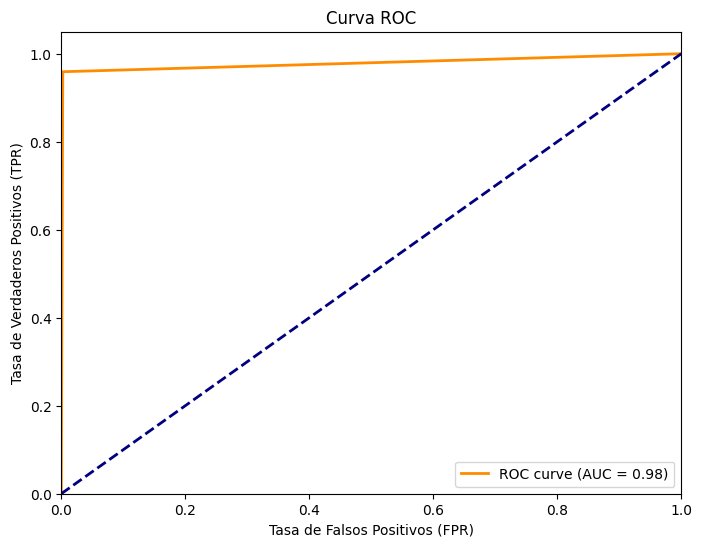

In [36]:
#regresion logistica
regression_logistic = RegressionLineal(data_clean)
x_test, y_test, y_pred, modelo = regression_logistic.logistic()
regression_logistic.logic_metrics(y_test, y_pred)

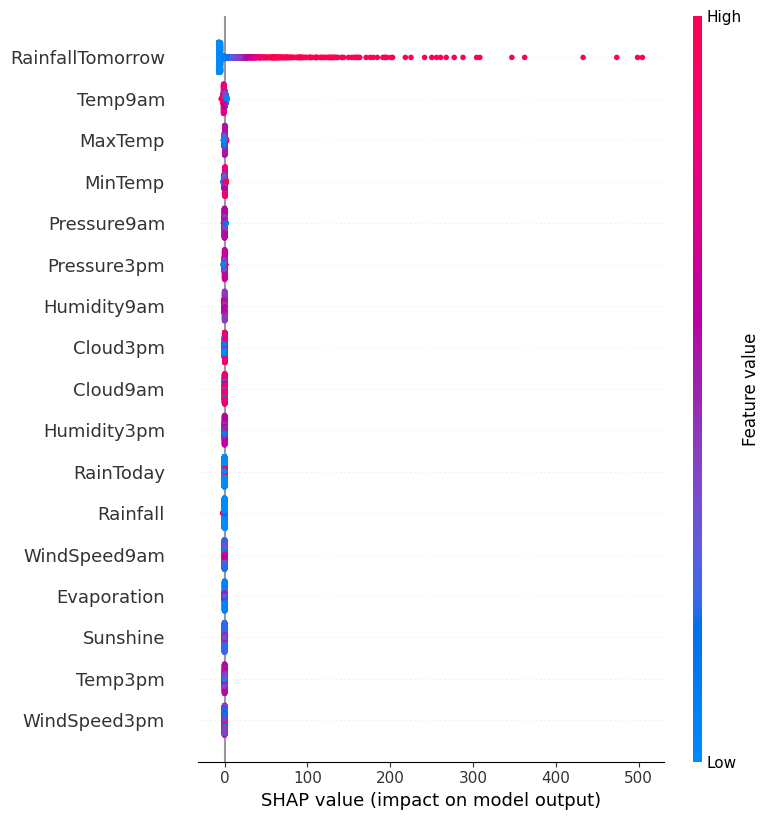

In [37]:
try:
    shap_analyzer = SHAPAnalyzer(modelo, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [38]:
regresion_lineal = RegressionLineal(data_clean)
#buscando los hipperparametros
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
x_test_logistic, y_test_logistic, y_pred_logistic, best_logistic_model = regresion_lineal.optimize_hyperparameters_logistic(param_grid_logistic)

# Calcular métricas
metricas_logistic = regresion_lineal.metrics(y_test_logistic, y_pred_logistic)

# Imprimir métricas y mejores hiperparámetros para la regresión logística
print(f"Métricas del mejor modelo de regresión logística:")
print(metricas_logistic)
print("Mejores hiperparámetros para la regresión logística:", best_logistic_model.get_params())


Métricas del mejor modelo de regresión logística:
{'MSE': 0.010472865756902571, 'R2': 0.9407654131946106, 'RMSE': 0.10233702046132949, 'MAE': 0.010472865756902571, 'MAPE': inf}
Mejores hiperparámetros para la regresión logística: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 10000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### Observamos que tanto el modelo como la validación cruzada tienden a sobreajustar las predicciones hacia la clase negativa. Esto se debe a que la clase negativa es la más predominante. Para abordar este desbalance, procedemos a equilibrar las clases.

Accuracy: 0.98
Precision: 0.95
Recall: 0.97
F1 Score: 0.96
ROC-AUC: 0.98
Matiz de confusión:
          pred: No  Pred: Si
Real: No      2388        40
Real: si        23       700


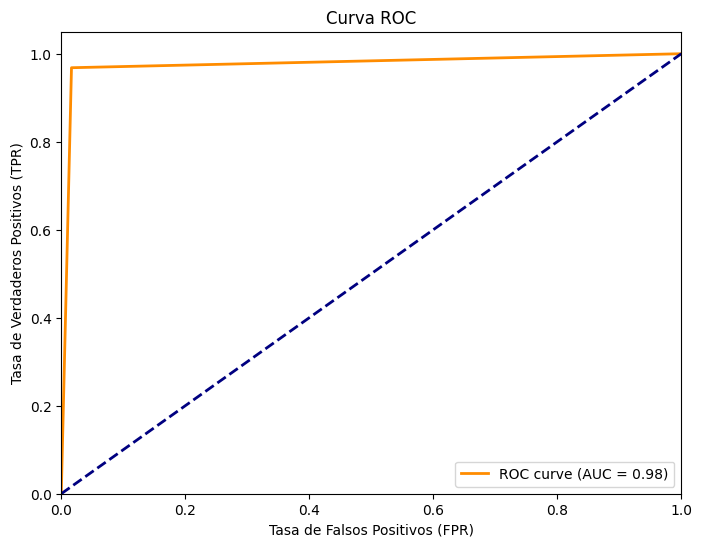

In [39]:
#regresion logistica balanceada
regression_logistic = RegressionLineal(data_clean)
x_test, y_test, y_pred, modelo = regression_logistic.logistic_balanced()
regression_logistic.logic_metrics(y_test, y_pred)

### Optamos por mantener el modelo balanceado, ya que aunque observamos una disminución en las métricas de predicción negativa, consideramos prioritario mejorar las métricas de predicción positiva. En este contexto, valoramos una mayor precisión en la anticipación de días lluviosos.

## Implementar un modelo base para clasificación y uno para regresión

In [40]:
#modelo base
regresion_model = RegresionModelBase(data_clean)
x_test, y_test, y_pred, modelo = regresion_model.regresion()


# También puedes acceder a los atributos del mejor modelo obtenido
print("Mejores hiperparámetros encontrados mediante Grid Search:")
print(modelo.get_params())

Error Cuadrático Medio en el conjunto de prueba: 37.57537998486206
Error Absoluto Medio en el conjunto de prueba: 2.1853779623665477
Raíz del Error Cuadrático Medio en el conjunto de prueba: 6.1298760170873
Coeficiente de Determinación (R^2) en el conjunto de prueba: 0.3085523612568144
Mejores hiperparámetros encontrados mediante Grid Search:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


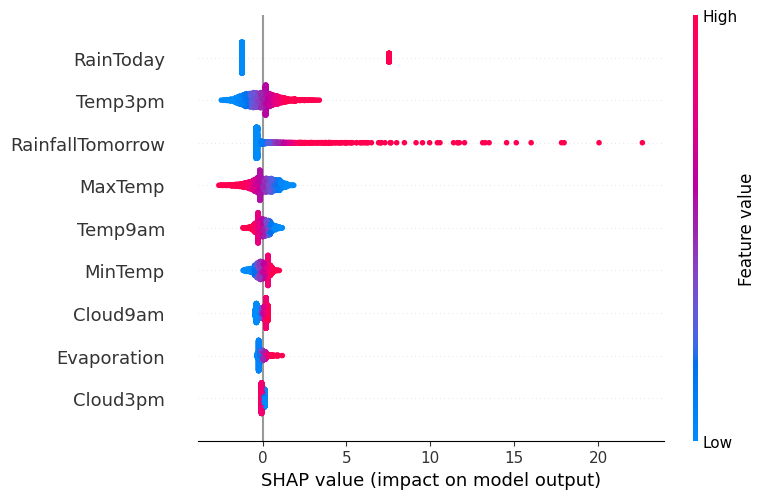

In [41]:
try:
    shap_analyzer = SHAPAnalyzer(modelo, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [42]:
#clasificador Base
clasification_model = ClasificationModelBase(data_clean)
# Entrenar el modelo y obtener los resultados
x_test, y_test, predictions, best_model = clasification_model.clasificacion()
print("Mejores hiperparámetros encontrados mediante Grid Search:")
print(best_model.get_params())

Precisión en el conjunto de prueba: 0.70
Recall en el conjunto de prueba: 0.32
F1-score en el conjunto de prueba: 0.44
Exactitud en el conjunto de prueba: 0.81
Mejores hiperparámetros encontrados mediante Grid Search:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


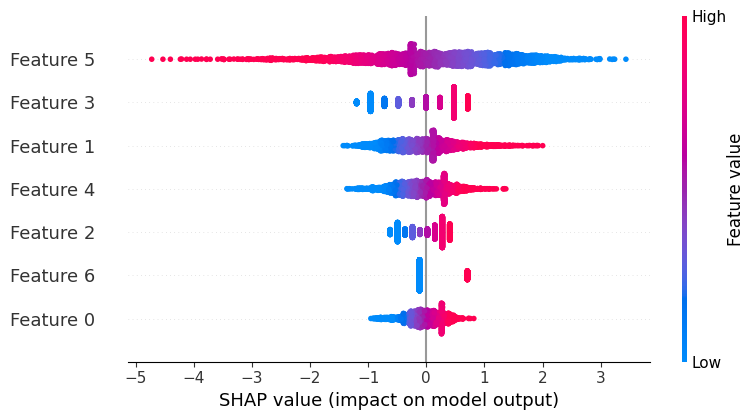

In [43]:
try:
    shap_analyzer = SHAPAnalyzer(best_model, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

## Implementar las soluciones con una red neuronal

In [44]:
print('=============================clasificacion con redes neuronales================================================')
classification_nn_model = ClassificationNeuralNetwork(data_clean)
trained_model = classification_nn_model.classification()


[I 2023-12-10 23:27:28,240] A new study created in memory with name: no-name-86dbef8f-35f4-4ffb-adc5-95c9f730b83a


=============================clasificacion con redes neuronales================================================


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:27:36,875] Trial 0 finished with value: 0.2297683275150746 and parameters: {'num_layers': 2, 'n_units_l0': 1, 'n_units_l1': 6, 'learning_rate': 4.1599289811154776e-05}. Best is trial 0 with value: 0.2297683275150746.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:27:45,683] Trial 1 finished with value: 0.22945096794668363 and parameters: {'num_layers': 3, 'n_units_l0': 6, 'n_units_l1': 15, 'n_units_l2': 4, 'learning_rate': 8.283854456567533e-05}. Best is trial 1 with value: 0.22945096794668363.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:27:54,317] Trial 2 finished with value: 0.219612821326563 and parameters: {'num_layers': 3, 'n_units_l0': 7, 'n_units_l1': 10, 'n_units_l2': 3, 'learning_rate': 0.0004926145992171892}. Best is trial 2 with value: 0.219612821326563.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:28:01,992] Trial 3 finished with value: 0.060933037131069456 and parameters: {'num_layers': 2, 'n_units_l0': 3, 'n_units_l1': 15, 'learning_rate': 0.0017919137578979636}. Best is trial 3 with value: 0.060933037131069456.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:28:12,135] Trial 4 finished with value: 0.20279276420184067 and parameters: {'num_layers': 3, 'n_units_l0': 8, 'n_units_l1': 12, 'n_units_l2': 4, 'learning_rate': 2.8445115320148246e-05}. Best is trial 3 with value: 0.060933037131069456.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:28:21,327] Trial 5 finished with value: 0.22945096794668363 and parameters: {'num_layers': 3, 'n_units_l0': 15, 'n_units_l1': 3, 'n_units_l2': 9, 'learning_rate': 0.026928624167111948}. Best is trial 3 with value: 0.060933037131069456.


99/99 [==============================] - 0s 2ms/step


[I 2023-12-10 23:28:31,358] Trial 6 finished with value: 0.22945096794668363 and parameters: {'num_layers': 3, 'n_units_l0': 8, 'n_units_l1': 1, 'n_units_l2': 14, 'learning_rate': 7.120349159506025e-05}. Best is trial 3 with value: 0.060933037131069456.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:28:39,143] Trial 7 finished with value: 0.1926372580133291 and parameters: {'num_layers': 2, 'n_units_l0': 8, 'n_units_l1': 9, 'learning_rate': 0.006604283256928248}. Best is trial 3 with value: 0.060933037131069456.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:28:48,033] Trial 8 finished with value: 0.22945096794668363 and parameters: {'num_layers': 3, 'n_units_l0': 6, 'n_units_l1': 1, 'n_units_l2': 16, 'learning_rate': 2.7553019610737203e-05}. Best is trial 3 with value: 0.060933037131069456.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:28:55,527] Trial 9 finished with value: 0.0025388765471279218 and parameters: {'num_layers': 2, 'n_units_l0': 15, 'n_units_l1': 15, 'learning_rate': 0.00123994762146192}. Best is trial 9 with value: 0.0025388765471279218.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:29:01,759] Trial 10 finished with value: 0.22945096794668363 and parameters: {'num_layers': 1, 'n_units_l0': 16, 'learning_rate': 0.07862524118731258}. Best is trial 9 with value: 0.0025388765471279218.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:29:08,177] Trial 11 finished with value: 0.006347191367819693 and parameters: {'num_layers': 1, 'n_units_l0': 12, 'learning_rate': 0.001420258136862389}. Best is trial 9 with value: 0.0025388765471279218.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:29:14,500] Trial 12 finished with value: 0.0 and parameters: {'num_layers': 1, 'n_units_l0': 12, 'learning_rate': 0.0007160420616323065}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:29:21,798] Trial 13 finished with value: 0.03332275468105361 and parameters: {'num_layers': 1, 'n_units_l0': 12, 'learning_rate': 0.00031290624219331895}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 2ms/step


[I 2023-12-10 23:29:28,996] Trial 14 finished with value: 0.021897810218978075 and parameters: {'num_layers': 1, 'n_units_l0': 12, 'learning_rate': 0.0034451785772712314}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:29:37,200] Trial 15 finished with value: 0.10028562361155191 and parameters: {'num_layers': 2, 'n_units_l0': 14, 'n_units_l1': 12, 'learning_rate': 0.0003681612670630876}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:29:43,710] Trial 16 finished with value: 0.16058394160583944 and parameters: {'num_layers': 1, 'n_units_l0': 11, 'learning_rate': 0.009261594444929798}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:29:52,177] Trial 17 finished with value: 0.09108219612821322 and parameters: {'num_layers': 2, 'n_units_l0': 10, 'n_units_l1': 16, 'learning_rate': 0.0008663482975613744}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:30:00,546] Trial 18 finished with value: 0.19866708981275782 and parameters: {'num_layers': 2, 'n_units_l0': 14, 'n_units_l1': 7, 'learning_rate': 0.0001616520431367683}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:30:06,887] Trial 19 finished with value: 0.00031735956839096247 and parameters: {'num_layers': 1, 'n_units_l0': 16, 'learning_rate': 0.001019316605732}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:30:13,518] Trial 20 finished with value: 0.3129165344335132 and parameters: {'num_layers': 1, 'n_units_l0': 16, 'learning_rate': 1.1440503841183883e-05}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:30:20,770] Trial 21 finished with value: 0.00031735956839096247 and parameters: {'num_layers': 1, 'n_units_l0': 14, 'learning_rate': 0.0008335040774101573}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:30:28,118] Trial 22 finished with value: 0.0009520787051729984 and parameters: {'num_layers': 1, 'n_units_l0': 13, 'learning_rate': 0.0006642998720034618}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:30:34,956] Trial 23 finished with value: 0.017454776261504268 and parameters: {'num_layers': 1, 'n_units_l0': 10, 'learning_rate': 0.00024499905127916383}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 997us/step


[I 2023-12-10 23:30:42,448] Trial 24 finished with value: 0.08695652173913049 and parameters: {'num_layers': 1, 'n_units_l0': 14, 'learning_rate': 0.0022747434516012777}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:30:48,342] Trial 25 finished with value: 0.0025388765471279218 and parameters: {'num_layers': 1, 'n_units_l0': 16, 'learning_rate': 0.0007114013271048733}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:30:54,241] Trial 26 finished with value: 0.014598540145985384 and parameters: {'num_layers': 1, 'n_units_l0': 13, 'learning_rate': 0.00330775535719824}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:31:01,030] Trial 27 finished with value: 0.0015867978419549233 and parameters: {'num_layers': 1, 'n_units_l0': 11, 'learning_rate': 0.0009466553090055228}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:31:10,766] Trial 28 finished with value: 0.08346556648682957 and parameters: {'num_layers': 1, 'n_units_l0': 15, 'learning_rate': 0.0001793241073903641}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:31:22,102] Trial 29 finished with value: 0.17867343700412563 and parameters: {'num_layers': 2, 'n_units_l0': 10, 'n_units_l1': 5, 'learning_rate': 0.0004431432765982236}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:31:34,944] Trial 30 finished with value: 0.22945096794668363 and parameters: {'num_layers': 1, 'n_units_l0': 1, 'learning_rate': 0.001362482644050602}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 2ms/step


[I 2023-12-10 23:31:48,124] Trial 31 finished with value: 0.0012694382735639609 and parameters: {'num_layers': 1, 'n_units_l0': 13, 'learning_rate': 0.0005442316742574631}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:32:00,559] Trial 32 finished with value: 0.0025388765471279218 and parameters: {'num_layers': 1, 'n_units_l0': 13, 'learning_rate': 0.0005933070964394577}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:32:08,770] Trial 33 finished with value: 0.0009520787051729984 and parameters: {'num_layers': 1, 'n_units_l0': 14, 'learning_rate': 0.0008174123229465535}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:32:16,682] Trial 34 finished with value: 0.11075848936845445 and parameters: {'num_layers': 1, 'n_units_l0': 15, 'learning_rate': 0.00014603373153557024}. Best is trial 12 with value: 0.0.


99/99 [==============================] - 0s 1ms/step


[I 2023-12-10 23:32:24,306] Trial 35 finished with value: 0.024119327197715035 and parameters: {'num_layers': 1, 'n_units_l0': 11, 'learning_rate': 0.000292861691594234}. Best is trial 12 with value: 0.0.
[W 2023-12-10 23:32:28,484] Trial 36 failed with parameters: {'num_layers': 1, 'n_units_l0': 4, 'learning_rate': 0.0021106844193682275} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\mirian\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "c:\Users\mirian\TP_AA1\code\neural_network\classification_neural.py", line 39, in objective
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
  File "c:\Users\mirian\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "c:\Users\mirian\AppData\Loca

KeyboardInterrupt: 

In [ ]:
regression_nn_model = RegressionNeuralNetwork(data_clean)
regression_nn_model.regression()

[I 2023-12-10 20:04:46,337] A new study created in memory with name: no-name-3929ac76-7d04-48df-b9ca-9086fd01c5a2
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 588us/step


[I 2023-12-10 20:04:49,750] Trial 0 finished with value: 1.5039236809263266e-11 and parameters: {'learning_rate': 0.020641615673379417}. Best is trial 0 with value: 1.5039236809263266e-11.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 572us/step


[I 2023-12-10 20:04:53,294] Trial 1 finished with value: 0.00029427287414572644 and parameters: {'learning_rate': 0.007727909148011469}. Best is trial 0 with value: 1.5039236809263266e-11.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 661us/step


[I 2023-12-10 20:04:57,955] Trial 2 finished with value: 69.61595894166649 and parameters: {'learning_rate': 2.078161427759918e-05}. Best is trial 0 with value: 1.5039236809263266e-11.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 666us/step


[I 2023-12-10 20:05:01,955] Trial 3 finished with value: 46.3438860594389 and parameters: {'learning_rate': 0.00018548766723558923}. Best is trial 0 with value: 1.5039236809263266e-11.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 581us/step


[I 2023-12-10 20:05:05,367] Trial 4 finished with value: 54.320020438904955 and parameters: {'learning_rate': 0.000261933465067241}. Best is trial 0 with value: 1.5039236809263266e-11.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 566us/step


[I 2023-12-10 20:05:08,747] Trial 5 finished with value: 35.24912336128072 and parameters: {'learning_rate': 0.0008168905949278785}. Best is trial 0 with value: 1.5039236809263266e-11.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 579us/step


[I 2023-12-10 20:05:12,333] Trial 6 finished with value: 47.732714273439264 and parameters: {'learning_rate': 2.0116390621451162e-05}. Best is trial 0 with value: 1.5039236809263266e-11.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 671us/step


[I 2023-12-10 20:05:15,905] Trial 7 finished with value: 6.242580514184012e-05 and parameters: {'learning_rate': 0.011212056131001541}. Best is trial 0 with value: 1.5039236809263266e-11.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 813us/step


[I 2023-12-10 20:05:19,957] Trial 8 finished with value: 1.493840781482963e-13 and parameters: {'learning_rate': 0.07672683917015417}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 575us/step


[I 2023-12-10 20:05:23,811] Trial 9 finished with value: 0.4734031295825076 and parameters: {'learning_rate': 0.004405967861553829}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 573us/step


[I 2023-12-10 20:05:27,555] Trial 10 finished with value: 1.224383246563091e-12 and parameters: {'learning_rate': 0.06571749977092553}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 599us/step


[I 2023-12-10 20:05:31,865] Trial 11 finished with value: 2.6406629784681165e-13 and parameters: {'learning_rate': 0.09397301055812597}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 728us/step


[I 2023-12-10 20:05:36,121] Trial 12 finished with value: 2.207076380897541e-13 and parameters: {'learning_rate': 0.08862549357362039}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 574us/step


[I 2023-12-10 20:05:41,686] Trial 13 finished with value: 4.4205658659587704e-13 and parameters: {'learning_rate': 0.09753201215965673}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 942us/step


[I 2023-12-10 20:05:46,334] Trial 14 finished with value: 3.2168970509265155e-12 and parameters: {'learning_rate': 0.02251406852888219}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 575us/step


[I 2023-12-10 20:05:50,158] Trial 15 finished with value: 3.2850611621785054e-12 and parameters: {'learning_rate': 0.03244332064223362}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 595us/step


[I 2023-12-10 20:05:53,582] Trial 16 finished with value: 0.25764093084513784 and parameters: {'learning_rate': 0.004426416158837452}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 692us/step


[I 2023-12-10 20:05:57,123] Trial 17 finished with value: 7.674221839210069e-12 and parameters: {'learning_rate': 0.03221270811728877}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 654us/step


[I 2023-12-10 20:06:00,755] Trial 18 finished with value: 1.7929619430095025e-13 and parameters: {'learning_rate': 0.09879062002588951}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 571us/step


[I 2023-12-10 20:06:04,125] Trial 19 finished with value: 13.075227100650414 and parameters: {'learning_rate': 0.0017099630880390085}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 586us/step


[I 2023-12-10 20:06:07,545] Trial 20 finished with value: 9.846399935589005e-06 and parameters: {'learning_rate': 0.010918628691907115}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 578us/step


[I 2023-12-10 20:06:10,911] Trial 21 finished with value: 2.90919391981546e-13 and parameters: {'learning_rate': 0.06323409247916022}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 565us/step


[I 2023-12-10 20:06:14,448] Trial 22 finished with value: 1.0024610645114582e-12 and parameters: {'learning_rate': 0.04548844175572962}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 1ms/step


[I 2023-12-10 20:06:19,557] Trial 23 finished with value: 2.9952589085864403e-13 and parameters: {'learning_rate': 0.08569929131103166}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 692us/step


[I 2023-12-10 20:06:24,106] Trial 24 finished with value: 2.9110410644007583e-12 and parameters: {'learning_rate': 0.031367073361754545}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 932us/step


[I 2023-12-10 20:06:28,780] Trial 25 finished with value: 1.7916466168525573e-13 and parameters: {'learning_rate': 0.04365130367013947}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 690us/step


[I 2023-12-10 20:06:32,942] Trial 26 finished with value: 8.39869679394431e-08 and parameters: {'learning_rate': 0.01744329936633459}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 685us/step


[I 2023-12-10 20:06:36,480] Trial 27 finished with value: 1.7617695171851516e-12 and parameters: {'learning_rate': 0.039616447126543095}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 574us/step


[I 2023-12-10 20:06:39,959] Trial 28 finished with value: 1.9702821267009522e-13 and parameters: {'learning_rate': 0.05014833481747962}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 713us/step


[I 2023-12-10 20:06:43,614] Trial 29 finished with value: 3.2172649870388803e-12 and parameters: {'learning_rate': 0.02098186855171086}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 692us/step


[I 2023-12-10 20:06:47,517] Trial 30 finished with value: 1.8150499554889845e-08 and parameters: {'learning_rate': 0.015715877974644247}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 595us/step


[I 2023-12-10 20:06:51,237] Trial 31 finished with value: 9.199643424754766e-13 and parameters: {'learning_rate': 0.04834550378994355}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 759us/step


[I 2023-12-10 20:06:55,243] Trial 32 finished with value: 5.883439605634299e-13 and parameters: {'learning_rate': 0.0487469243154355}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 607us/step


[I 2023-12-10 20:06:58,848] Trial 33 finished with value: 2.4479043677401874e-11 and parameters: {'learning_rate': 0.02532476917370105}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 896us/step


[I 2023-12-10 20:07:02,980] Trial 34 finished with value: 1.7817215924409444e-12 and parameters: {'learning_rate': 0.054024942556935115}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 562us/step


[I 2023-12-10 20:07:06,929] Trial 35 finished with value: 0.00014823555596491653 and parameters: {'learning_rate': 0.007248400127514192}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 559us/step


[I 2023-12-10 20:07:10,352] Trial 36 finished with value: 3.9973241310793916e-13 and parameters: {'learning_rate': 0.09939652536307503}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 575us/step


[I 2023-12-10 20:07:13,741] Trial 37 finished with value: 3.305884196946183e-12 and parameters: {'learning_rate': 0.03276122458375105}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 695us/step


[I 2023-12-10 20:07:17,138] Trial 38 finished with value: 2.720438245380307e-06 and parameters: {'learning_rate': 0.014074838966796075}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 614us/step


[I 2023-12-10 20:07:21,009] Trial 39 finished with value: 1.547706941856813e-13 and parameters: {'learning_rate': 0.05077832372859492}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 582us/step


[I 2023-12-10 20:07:24,540] Trial 40 finished with value: 0.0004211397810926927 and parameters: {'learning_rate': 0.008401506003411201}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 589us/step


[I 2023-12-10 20:07:28,084] Trial 41 finished with value: 1.8215733085992943e-12 and parameters: {'learning_rate': 0.05934783578869389}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 624us/step


[I 2023-12-10 20:07:31,790] Trial 42 finished with value: 1.0638664789224686e-11 and parameters: {'learning_rate': 0.02266923245628208}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 797us/step


[I 2023-12-10 20:07:35,294] Trial 43 finished with value: 1.6535818088612929e-13 and parameters: {'learning_rate': 0.061019541201635795}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 821us/step


[I 2023-12-10 20:07:39,266] Trial 44 finished with value: 1.7015201142450997e-13 and parameters: {'learning_rate': 0.07245494813683807}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 774us/step


[I 2023-12-10 20:07:43,603] Trial 45 finished with value: 1.8198153926634803e-12 and parameters: {'learning_rate': 0.035962275695933965}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 656us/step


[I 2023-12-10 20:07:47,656] Trial 46 finished with value: 5.540432765234923e-13 and parameters: {'learning_rate': 0.06621832634583245}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 652us/step


[I 2023-12-10 20:07:51,753] Trial 47 finished with value: 5.538339653634825e-11 and parameters: {'learning_rate': 0.02012908749982641}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 574us/step


[I 2023-12-10 20:07:55,503] Trial 48 finished with value: 7.959560515124544e-12 and parameters: {'learning_rate': 0.02682426316279704}. Best is trial 8 with value: 1.493840781482963e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


100/100 [==============================] - 0s 633us/step


[I 2023-12-10 20:07:59,316] Trial 49 finished with value: 7.639995454247318e-13 and parameters: {'learning_rate': 0.060914952002585}. Best is trial 8 with value: 1.493840781482963e-13.


Epoch 1/10
400/400 [==============================] - 1s 689us/step - loss: 8.6060
Epoch 2/10
400/400 [==============================] - 0s 675us/step - loss: 4.1244e-04
Epoch 3/10
400/400 [==============================] - 0s 693us/step - loss: 1.0129e-07
Epoch 4/10
400/400 [==============================] - 0s 710us/step - loss: 1.6905e-10
Epoch 5/10
400/400 [==============================] - 0s 790us/step - loss: 3.2392e-12
Epoch 6/10
400/400 [==============================] - 0s 828us/step - loss: 3.2975e-12
Epoch 7/10
400/400 [==============================] - 0s 903us/step - loss: 2.8307e-12
Epoch 8/10
400/400 [==============================] - 0s 821us/step - loss: 1.3543e-12
Epoch 9/10
400/400 [==============================] - 0s 812us/step - loss: 2.5868e-13
Epoch 10/10
100/100 [==============================] - 0s 659us/step
Error Cuadrático Medio en el conjunto de prueba: 3.7557484882354723e-13
